In [1]:
import numpy as np
import pandas as pd
import csv as csv
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

In [3]:
train_set = train_set.reindex_axis(['Cover_Type'] + list(train_set.columns[:-1]), axis=1)
train_set['Distance_To_Hydrology'] = np.sqrt(train_set.Vertical_Distance_To_Hydrology**2 
                                             + train_set.Horizontal_Distance_To_Hydrology**2)
train_set['Downhill_Hydrology'] = train_set.Vertical_Distance_To_Hydrology < 0
train_set['Hillshade_Total'] = train_set.Hillshade_9am + train_set.Hillshade_Noon + train_set.Hillshade_3pm
train_set['Hillshade_Avg'] = (train_set.Hillshade_9am + train_set.Hillshade_Noon + train_set.Hillshade_3pm)/255

In [4]:
train_set.head()

Cover_Type  Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0           5   1       2596      51      3                               258   
1           5   2       2590      56      2                               212   
2           2   3       2804     139      9                               268   
3           2   4       2785     155     18                               242   
4           5   5       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon      ...        Soil_Type35  Soil_Type36  \
0            221             232      ...                  0            0   
1            220             235      ...                  0            0   
2            234             238      ...                  0            0   
3            238             238      ...                  0            0   
4            220             234      ...                  0            0   

   Soil_Type37  Soil_Type38  Soil_Type39  Soil_Type40  Distance_To_Hydrology  \
0            0            0            0            0             258.000000   
1            0            0            0            0             212.084889   
2            0            0            0            0             275.769832   
3            0            0            0            0             269.235956   
4            0            0            0            0             153.003268   

   Downhill_Hydrology  Hillshade_Total  Hillshade_Avg  
0               False              601       2.356863  
1                True              606       2.376471  
2               False              607       2.380392  
3               False              598       2.345098  
4                True              604       2.368627  

[5 rows x 60 columns]

In [5]:
spruce = train_set[train_set.Cover_Type == 1]
lodgepoll = train_set[train_set.Cover_Type == 2]
ponderosa = train_set[train_set.Cover_Type == 3]
cottonwood = train_set[train_set.Cover_Type == 4]
aspen = train_set[train_set.Cover_Type == 5]
douglas = train_set[train_set.Cover_Type == 6]
krummholz = train_set[train_set.Cover_Type == 7]

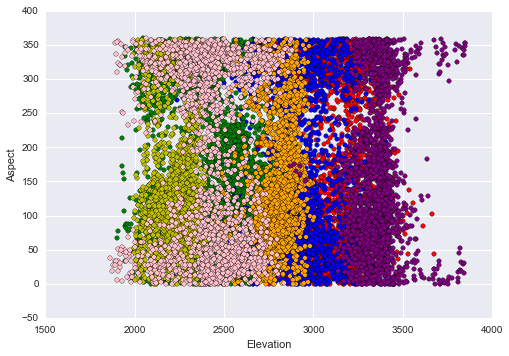

In [6]:
plt.scatter(spruce.Elevation, spruce.Aspect, c = 'r')
plt.scatter(lodgepoll.Elevation, spruce.Aspect, c = 'b')
plt.scatter(ponderosa.Elevation, ponderosa.Aspect, c = 'g')
plt.scatter(cottonwood.Elevation, cottonwood.Aspect, c = 'y')
plt.scatter(aspen.Elevation, aspen.Aspect, c = 'orange')
plt.scatter(douglas.Elevation, douglas.Aspect, c = 'pink')
plt.scatter(krummholz.Elevation, krummholz.Aspect, c = 'purple')
plt.xlabel('Elevation')
plt.ylabel('Aspect')

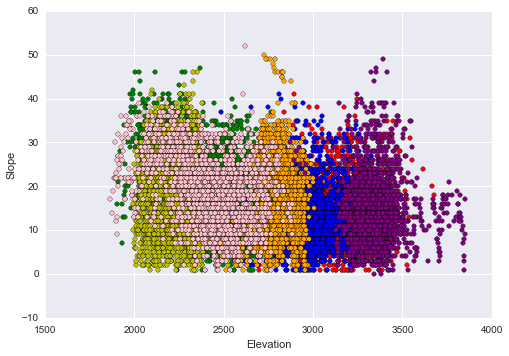

In [7]:
plt.scatter(spruce.Elevation, spruce.Slope, c = 'r')
plt.scatter(lodgepoll.Elevation, spruce.Slope, c = 'b')
plt.scatter(ponderosa.Elevation, ponderosa.Slope, c = 'g')
plt.scatter(cottonwood.Elevation, cottonwood.Slope, c = 'y')
plt.scatter(aspen.Elevation, aspen.Slope, c = 'orange')
plt.scatter(douglas.Elevation, douglas.Slope, c = 'pink')
plt.scatter(krummholz.Elevation, krummholz.Slope, c = 'purple')
plt.xlabel('Elevation')
plt.ylabel('Slope')

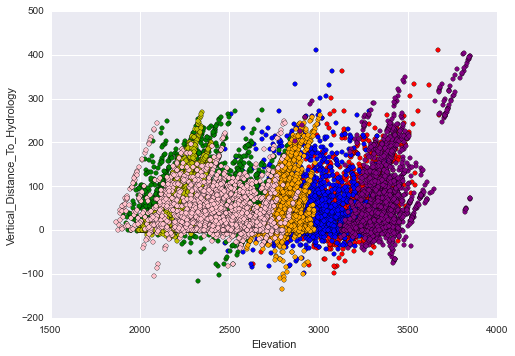

In [8]:
plt.scatter(spruce.Elevation, spruce.Vertical_Distance_To_Hydrology, c = 'r')
plt.scatter(lodgepoll.Elevation, spruce.Vertical_Distance_To_Hydrology, c = 'b')
plt.scatter(ponderosa.Elevation, ponderosa.Vertical_Distance_To_Hydrology, c = 'g')
plt.scatter(cottonwood.Elevation, cottonwood.Vertical_Distance_To_Hydrology, c = 'y')
plt.scatter(aspen.Elevation, aspen.Vertical_Distance_To_Hydrology, c = 'orange')
plt.scatter(douglas.Elevation, douglas.Vertical_Distance_To_Hydrology, c = 'pink')
plt.scatter(krummholz.Elevation, krummholz.Vertical_Distance_To_Hydrology, c = 'purple')
plt.xlabel('Elevation')
plt.ylabel('Vertical_Distance_To_Hydrology')

In [9]:
train_set.describe()

Cover_Type           Id     Elevation        Aspect         Slope  \
count  15120.000000  15120.00000  15120.000000  15120.000000  15120.000000   
mean       4.000000   7560.50000   2749.322553    156.676653     16.501587   
std        2.000066   4364.91237    417.678187    110.085801      8.453927   
min        1.000000      1.00000   1863.000000      0.000000      0.000000   
25%        2.000000   3780.75000   2376.000000     65.000000     10.000000   
50%        4.000000   7560.50000   2752.000000    126.000000     15.000000   
75%        6.000000  11340.25000   3104.000000    261.000000     22.000000   
max        7.000000  15120.00000   3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%                          330.000000                       79.000000   
max                         1343.000000                      554.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     15120.000000   15120.000000    15120.000000   
mean                       1714.023214     212.704299      218.965608   
std                        1325.066358      30.561287       22.801966   
min                           0.000000       0.000000       99.000000   
25%                         764.000000     196.000000      207.000000   
50%                        1316.000000     220.000000      223.000000   
75%                        2270.000000     235.000000      235.000000   
max                        6890.000000     254.000000      254.000000   

           ...         Soil_Type35   Soil_Type36   Soil_Type37   Soil_Type38  \
count      ...        15120.000000  15120.000000  15120.000000  15120.000000   
mean       ...            0.006746      0.000661      0.002249      0.048148   
std        ...            0.081859      0.025710      0.047368      0.214086   
min        ...            0.000000      0.000000      0.000000      0.000000   
25%        ...            0.000000      0.000000      0.000000      0.000000   
50%        ...            0.000000      0.000000      0.000000      0.000000   
75%        ...            0.000000      0.000000      0.000000      0.000000   
max        ...            1.000000      1.000000      1.000000      1.000000   

        Soil_Type39   Soil_Type40  Distance_To_Hydrology  Downhill_Hydrology  \
count  15120.000000  15120.000000           15120.000000               15120   
mean       0.043452      0.030357             235.948778          0.07533069   
std        0.203880      0.171574             215.491695           0.2639329   
min        0.000000      0.000000               0.000000               False   
25%        0.000000      0.000000              67.186308                   0   
50%        0.000000      0.000000             188.480768                   0   
75%        0.000000      0.000000             342.069071                   0   
max        1.000000      1.000000            1356.939571                True   

       Hillshade_Total  Hillshade_Avg  
count     15120.000000   15120.000000  
mean        566.761905       2.222596  
std          51.375104       0.201471  
min         317.000000       1.243137  
25%         541.000000       2.121569  
50%         577.000000       2.262745  
75%         604.000000       2.368627  
max         641.000000       2.513725  

[8 rows x 60 columns]

In [10]:
train_set.columns

Index(['Cover_Type', 'Id', 'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Distance_To_Hydrology', 'Downhill_Hydrology', 'Hillshade_Total', 'Hillshad

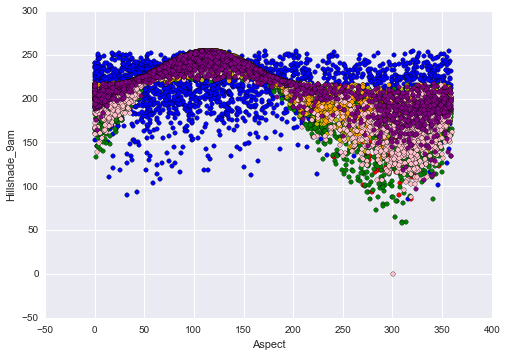

In [11]:
plt.scatter(spruce.Aspect, spruce.Hillshade_9am, c = 'r')
plt.scatter(lodgepoll.Aspect, spruce.Hillshade_9am, c = 'b')
plt.scatter(ponderosa.Aspect, ponderosa.Hillshade_9am, c = 'g')
plt.scatter(cottonwood.Aspect, cottonwood.Hillshade_9am, c = 'y')
plt.scatter(aspen.Aspect, aspen.Hillshade_9am, c = 'orange')
plt.scatter(douglas.Aspect, douglas.Hillshade_9am, c = 'pink')
plt.scatter(krummholz.Aspect, krummholz.Hillshade_9am, c = 'purple')
plt.xlabel('Aspect')
plt.ylabel('Hillshade_9am')

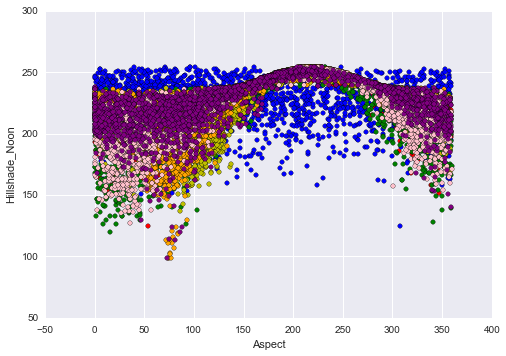

In [12]:
plt.scatter(spruce.Aspect, spruce.Hillshade_Noon, c = 'r')
plt.scatter(lodgepoll.Aspect, spruce.Hillshade_Noon, c = 'b')
plt.scatter(ponderosa.Aspect, ponderosa.Hillshade_Noon, c = 'g')
plt.scatter(cottonwood.Aspect, cottonwood.Hillshade_Noon, c = 'y')
plt.scatter(aspen.Aspect, aspen.Hillshade_Noon, c = 'orange')
plt.scatter(douglas.Aspect, douglas.Hillshade_Noon, c = 'pink')
plt.scatter(krummholz.Aspect, krummholz.Hillshade_Noon, c = 'purple')
plt.xlabel('Aspect')
plt.ylabel('Hillshade_Noon')

In [13]:
train_set.columns

Index(['Cover_Type', 'Id', 'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Distance_To_Hydrology', 'Downhill_Hydrology', 'Hillshade_Total', 'Hillshad

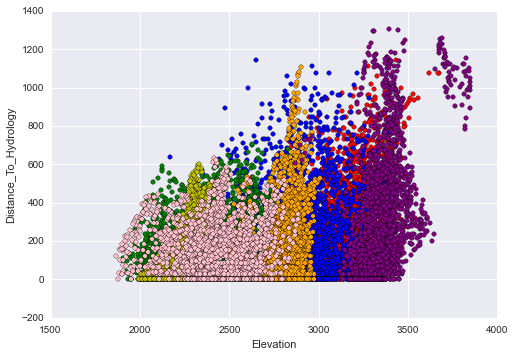

In [14]:
plt.scatter(spruce.Elevation, spruce.Distance_To_Hydrology, c = 'r')
plt.scatter(lodgepoll.Elevation, spruce.Distance_To_Hydrology, c = 'b')
plt.scatter(ponderosa.Elevation, ponderosa.Distance_To_Hydrology, c = 'g')
plt.scatter(cottonwood.Elevation, cottonwood.Distance_To_Hydrology, c = 'y')
plt.scatter(aspen.Elevation, aspen.Distance_To_Hydrology, c = 'orange')
plt.scatter(douglas.Elevation, douglas.Distance_To_Hydrology, c = 'pink')
plt.scatter(krummholz.Elevation, krummholz.Distance_To_Hydrology, c = 'purple')
plt.xlabel('Elevation')
plt.ylabel('Distance_To_Hydrology')

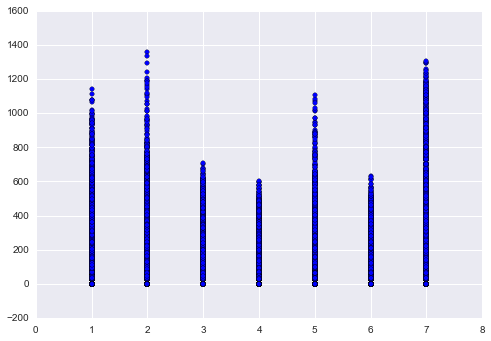

In [15]:
plt.scatter(train_set.Cover_Type, train_set.Distance_To_Hydrology)

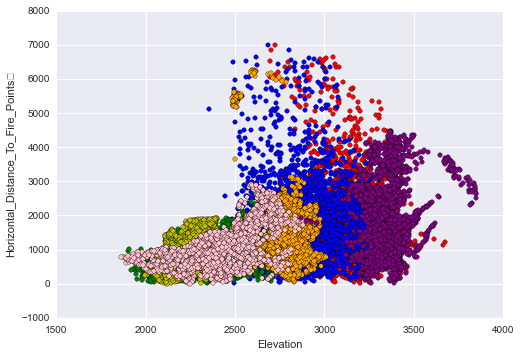

In [16]:
plt.scatter(spruce.Elevation, spruce.Horizontal_Distance_To_Fire_Points	, c = 'r')
plt.scatter(lodgepoll.Elevation, spruce.Horizontal_Distance_To_Fire_Points	, c = 'b')
plt.scatter(ponderosa.Elevation, ponderosa.Horizontal_Distance_To_Fire_Points	, c = 'g')
plt.scatter(cottonwood.Elevation, cottonwood.Horizontal_Distance_To_Fire_Points	, c = 'y')
plt.scatter(aspen.Elevation, aspen.Horizontal_Distance_To_Fire_Points	, c = 'orange')
plt.scatter(douglas.Elevation, douglas.Horizontal_Distance_To_Fire_Points	, c = 'pink')
plt.scatter(krummholz.Elevation, krummholz.Horizontal_Distance_To_Fire_Points	, c = 'purple')
plt.xlabel('Elevation')
plt.ylabel('Horizontal_Distance_To_Fire_Points	')

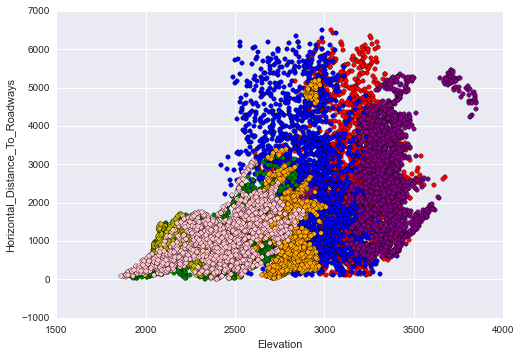

In [17]:
plt.scatter(spruce.Elevation, spruce.Horizontal_Distance_To_Roadways, c = 'r')
plt.scatter(lodgepoll.Elevation, spruce.Horizontal_Distance_To_Roadways, c = 'b')
plt.scatter(ponderosa.Elevation, ponderosa.Horizontal_Distance_To_Roadways, c = 'g')
plt.scatter(cottonwood.Elevation, cottonwood.Horizontal_Distance_To_Roadways, c = 'y')
plt.scatter(aspen.Elevation, aspen.Horizontal_Distance_To_Roadways, c = 'orange')
plt.scatter(douglas.Elevation, douglas.Horizontal_Distance_To_Roadways, c = 'pink')
plt.scatter(krummholz.Elevation, krummholz.Horizontal_Distance_To_Roadways, c = 'purple')
plt.xlabel('Elevation')
plt.ylabel('Horizontal_Distance_To_Roadways')

In [18]:
train_set.describe()

Cover_Type           Id     Elevation        Aspect         Slope  \
count  15120.000000  15120.00000  15120.000000  15120.000000  15120.000000   
mean       4.000000   7560.50000   2749.322553    156.676653     16.501587   
std        2.000066   4364.91237    417.678187    110.085801      8.453927   
min        1.000000      1.00000   1863.000000      0.000000      0.000000   
25%        2.000000   3780.75000   2376.000000     65.000000     10.000000   
50%        4.000000   7560.50000   2752.000000    126.000000     15.000000   
75%        6.000000  11340.25000   3104.000000    261.000000     22.000000   
max        7.000000  15120.00000   3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%                          330.000000                       79.000000   
max                         1343.000000                      554.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     15120.000000   15120.000000    15120.000000   
mean                       1714.023214     212.704299      218.965608   
std                        1325.066358      30.561287       22.801966   
min                           0.000000       0.000000       99.000000   
25%                         764.000000     196.000000      207.000000   
50%                        1316.000000     220.000000      223.000000   
75%                        2270.000000     235.000000      235.000000   
max                        6890.000000     254.000000      254.000000   

           ...         Soil_Type35   Soil_Type36   Soil_Type37   Soil_Type38  \
count      ...        15120.000000  15120.000000  15120.000000  15120.000000   
mean       ...            0.006746      0.000661      0.002249      0.048148   
std        ...            0.081859      0.025710      0.047368      0.214086   
min        ...            0.000000      0.000000      0.000000      0.000000   
25%        ...            0.000000      0.000000      0.000000      0.000000   
50%        ...            0.000000      0.000000      0.000000      0.000000   
75%        ...            0.000000      0.000000      0.000000      0.000000   
max        ...            1.000000      1.000000      1.000000      1.000000   

        Soil_Type39   Soil_Type40  Distance_To_Hydrology  Downhill_Hydrology  \
count  15120.000000  15120.000000           15120.000000               15120   
mean       0.043452      0.030357             235.948778          0.07533069   
std        0.203880      0.171574             215.491695           0.2639329   
min        0.000000      0.000000               0.000000               False   
25%        0.000000      0.000000              67.186308                   0   
50%        0.000000      0.000000             188.480768                   0   
75%        0.000000      0.000000             342.069071                   0   
max        1.000000      1.000000            1356.939571                True   

       Hillshade_Total  Hillshade_Avg  
count     15120.000000   15120.000000  
mean        566.761905       2.222596  
std          51.375104       0.201471  
min         317.000000       1.243137  
25%         541.000000       2.121569  
50%         577.000000       2.262745  
75%         604.000000       2.368627  
max         641.000000       2.513725  

[8 rows x 60 columns]

In [19]:
train_set[train_set.Hillshade_3pm == 0].describe()

Cover_Type            Id    Elevation      Aspect      Slope  \
count   88.000000     88.000000    88.000000   88.000000  88.000000   
mean     4.590909   5691.977273  2604.579545   89.556818  37.715909   
std      1.528551   4499.066792   496.822009   20.328259   7.772555   
min      1.000000   1376.000000  1931.000000   47.000000   7.000000   
25%      4.000000   2249.500000  2137.000000   78.000000  33.750000   
50%      4.000000   3147.500000  2718.500000   88.000000  38.000000   
75%      5.000000   8443.500000  2913.750000   99.250000  44.000000   
max      7.000000  14946.000000  3472.000000  214.000000  50.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                         88.000000                       88.000000   
mean                         163.000000                       77.261364   
std                          111.354874                       60.419509   
min                            0.000000                      -26.000000   
25%                           90.000000                       23.750000   
50%                          142.000000                       72.000000   
75%                          228.000000                      119.500000   
max                          524.000000                      230.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                        88.000000      88.000000       88.000000   
mean                       1015.011364     239.818182      151.954545   
std                        1083.948481      11.848222       28.576942   
min                          30.000000     203.000000       99.000000   
25%                         265.000000     231.000000      125.750000   
50%                         530.500000     243.500000      157.500000   
75%                        1579.750000     250.000000      172.000000   
max                        4094.000000     254.000000      247.000000   

           ...        Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  \
count      ...                 88           88    88.000000           88   
mean       ...                  0            0     0.011364            0   
std        ...                  0            0     0.106600            0   
min        ...                  0            0     0.000000            0   
25%        ...                  0            0     0.000000            0   
50%        ...                  0            0     0.000000            0   
75%        ...                  0            0     0.000000            0   
max        ...                  0            0     1.000000            0   

       Soil_Type39  Soil_Type40  Distance_To_Hydrology  Downhill_Hydrology  \
count    88.000000    88.000000              88.000000                  88   
mean      0.147727     0.011364             184.123641          0.04545455   
std       0.356863     0.106600             121.126212           0.2094926   
min       0.000000     0.000000               0.000000               False   
25%       0.000000     0.000000             102.190960                   0   
50%       0.000000     0.000000             163.877887                   0   
75%       0.000000     0.000000             255.899664                   0   
max       1.000000     1.000000             550.886558                True   

       Hillshade_Total  Hillshade_Avg  
count        88.000000      88.000000  
mean        391.772727       1.536364  
std          37.048501       0.145288  
min         317.000000       1.243137  
25%         360.250000       1.412745  
50%         405.500000       1.590196  
75%         419.000000       1.643137  
max         460.000000       1.803922  

[8 rows x 60 columns]

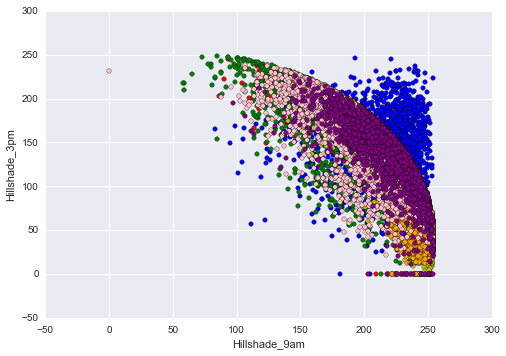

In [20]:
plt.scatter(spruce.Hillshade_9am, spruce.Hillshade_3pm, c = 'r')
plt.scatter(lodgepoll.Hillshade_9am, spruce.Hillshade_3pm, c = 'b')
plt.scatter(ponderosa.Hillshade_9am, ponderosa.Hillshade_3pm, c = 'g')
plt.scatter(cottonwood.Hillshade_9am, cottonwood.Hillshade_3pm, c = 'y')
plt.scatter(aspen.Hillshade_9am, aspen.Hillshade_3pm, c = 'orange')
plt.scatter(douglas.Hillshade_9am, douglas.Hillshade_3pm, c = 'pink')
plt.scatter(krummholz.Hillshade_9am, krummholz.Hillshade_3pm, c = 'purple')
plt.xlabel('Hillshade_9am')
plt.ylabel('Hillshade_3pm')

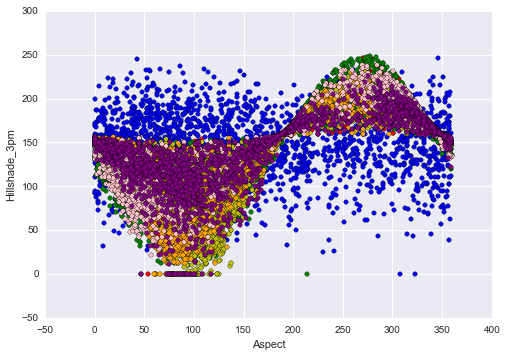

In [21]:
plt.scatter(spruce.Aspect, spruce.Hillshade_3pm, c = 'r')
plt.scatter(lodgepoll.Aspect, spruce.Hillshade_3pm, c = 'b')
plt.scatter(ponderosa.Aspect, ponderosa.Hillshade_3pm, c = 'g')
plt.scatter(cottonwood.Aspect, cottonwood.Hillshade_3pm, c = 'y')
plt.scatter(aspen.Aspect, aspen.Hillshade_3pm, c = 'orange')
plt.scatter(douglas.Aspect, douglas.Hillshade_3pm, c = 'pink')
plt.scatter(krummholz.Aspect, krummholz.Hillshade_3pm, c = 'purple')
plt.xlabel('Aspect')
plt.ylabel('Hillshade_3pm')

In [22]:
train_set.Slope.describe()

count    15120.000000
mean        16.501587
std          8.453927
min          0.000000
25%         10.000000
50%         15.000000
75%         22.000000
max         52.000000
Name: Slope, dtype: float64

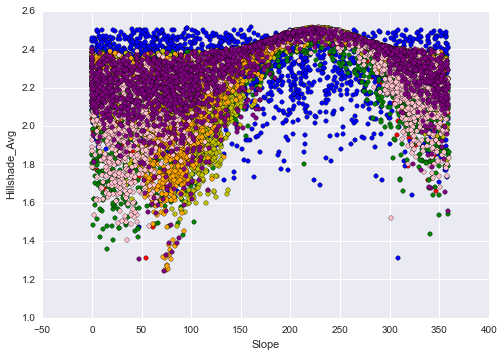

In [23]:
plt.scatter(spruce.Aspect, spruce.Hillshade_Avg, c = 'r')
plt.scatter(lodgepoll.Aspect, spruce.Hillshade_Avg, c = 'b')
plt.scatter(ponderosa.Aspect, ponderosa.Hillshade_Avg, c = 'g')
plt.scatter(cottonwood.Aspect, cottonwood.Hillshade_Avg, c = 'y')
plt.scatter(aspen.Aspect, aspen.Hillshade_Avg, c = 'orange')
plt.scatter(douglas.Aspect, douglas.Hillshade_Avg, c = 'pink')
plt.scatter(krummholz.Aspect, krummholz.Hillshade_Avg, c = 'purple')
plt.xlabel('Slope')
plt.ylabel('Hillshade_Avg')

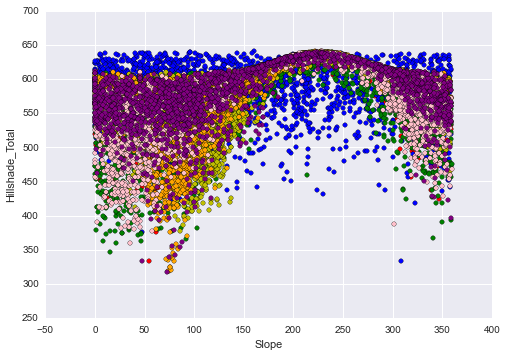

In [24]:
plt.scatter(spruce.Aspect, spruce.Hillshade_Total, c = 'r')
plt.scatter(lodgepoll.Aspect, spruce.Hillshade_Total, c = 'b')
plt.scatter(ponderosa.Aspect, ponderosa.Hillshade_Total, c = 'g')
plt.scatter(cottonwood.Aspect, cottonwood.Hillshade_Total, c = 'y')
plt.scatter(aspen.Aspect, aspen.Hillshade_Total, c = 'orange')
plt.scatter(douglas.Aspect, douglas.Hillshade_Total, c = 'pink')
plt.scatter(krummholz.Aspect, krummholz.Hillshade_Total, c = 'purple')
plt.xlabel('Slope')
plt.ylabel('Hillshade_Total')

In [25]:
train_set.Cover_Type.describe()

count    15120.000000
mean         4.000000
std          2.000066
min          1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max          7.000000
Name: Cover_Type, dtype: float64

In [26]:
train_set.cov()

Cover_Type            Id    Elevation  \
Cover_Type                              4.000265      946.0249     13.44137   
Id                                      946.0249  1.905246e+07     338182.9   
Elevation                               13.44137      338182.9     174455.1   
Aspect                                  1.764733      8505.845    -510.2013   
Slope                                   1.483233     -744.2124    -1103.937   
Horizontal_Distance_To_Hydrology       -4.418149      91363.07     36212.91   
Vertical_Distance_To_Hydrology          9.265428      14794.67     3122.903   
Horizontal_Distance_To_Roadways        -280.0282     -191028.2     320259.6   
Hillshade_9am                         -0.6287453      104.8841     1249.675   
Hillshade_Noon                         -4.510616      7277.825     2055.083   
Hillshade_3pm                          -4.901647      8518.805         1716   
Horizontal_Distance_To_Fire_Points     -196.6508     -330023.1     203781.7   
Wilderness_Area1                      -0.1959786     -631.6723     58.76505   
Wilderness_Area2                     0.005357497      123.5837     19.52967   
Wilderness_Area3                       0.1205768      827.7407     72.98202   
Wilderness_Area4                      0.07004432     -319.6521    -151.2767   
Soil_Type1                           0.004563794     -38.63321    -13.83944   
Soil_Type2                           0.008995304      39.51521    -12.28269   
Soil_Type3                          -0.008003175     -48.75084    -31.35236   
Soil_Type4                           -0.01276539      118.3968     -12.0125   
Soil_Type5                           0.005754349     -18.91663    -6.139442   
Soil_Type6                           0.002645678     -40.74218    -15.87298   
Soil_Type7                                     0             0            0   
Soil_Type8                         -0.0001322839    -0.4671275  0.009966099   
Soil_Type9                          -0.001388981     -1.595674   -0.1135145   
Soil_Type10                           0.08995304      49.15252    -52.11687   
Soil_Type11                          0.003307097      44.71645    -2.559426   
Soil_Type12                          -0.03161585     -68.96888    0.8854276   
Soil_Type13                           0.01415438      11.54336     2.866622   
Soil_Type14                          0.004629936     -7.358059    -6.174847   
Soil_Type15                                    0             0            0   
Soil_Type16                          0.001521265     -1.432701    -2.393794   
Soil_Type17                           0.01673391       -2.5294    -16.51779   
Soil_Type18                         0.0007937033     -19.27892   -0.9236294   
Soil_Type19                         -0.003505523     -7.141411    0.6857043   
Soil_Type20                          -0.01011972     -28.96875    0.3407742   
Soil_Type21                         -0.001587407      2.091077    0.4414868   
Soil_Type22                          -0.05853562      23.29483     9.120757   
Soil_Type23                          -0.06925061      -16.5842     14.56292   
Soil_Type24                          -0.02605992      19.19436     5.272115   
Soil_Type25                        -0.0001322839     0.2014353   0.03595988   
Soil_Type26                           -0.0020504      8.118063    0.5150197   
Soil_Type27                         -0.001455123      3.317448     0.526236   
Soil_Type28                        -0.0005952775    -0.5433891  -0.01097314   
Soil_Type29                           -0.1221642       -282.73      19.2951   
Soil_Type30                         0.0005952775     -146.9049     4.301882   
Soil_Type31                          -0.02341425       16.5206     5.704274   
Soil_Type32                          -0.05522852      61.98816     15.02351   
Soil_Type33                            -0.031219      57.71837     10.22431   
Soil_Type34                        -0.0002645678      3.746875    0.3482971   
Soil_Type

In [27]:
train_set.describe()

Cover_Type           Id     Elevation        Aspect         Slope  \
count  15120.000000  15120.00000  15120.000000  15120.000000  15120.000000   
mean       4.000000   7560.50000   2749.322553    156.676653     16.501587   
std        2.000066   4364.91237    417.678187    110.085801      8.453927   
min        1.000000      1.00000   1863.000000      0.000000      0.000000   
25%        2.000000   3780.75000   2376.000000     65.000000     10.000000   
50%        4.000000   7560.50000   2752.000000    126.000000     15.000000   
75%        6.000000  11340.25000   3104.000000    261.000000     22.000000   
max        7.000000  15120.00000   3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%                          330.000000                       79.000000   
max                         1343.000000                      554.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     15120.000000   15120.000000    15120.000000   
mean                       1714.023214     212.704299      218.965608   
std                        1325.066358      30.561287       22.801966   
min                           0.000000       0.000000       99.000000   
25%                         764.000000     196.000000      207.000000   
50%                        1316.000000     220.000000      223.000000   
75%                        2270.000000     235.000000      235.000000   
max                        6890.000000     254.000000      254.000000   

           ...         Soil_Type35   Soil_Type36   Soil_Type37   Soil_Type38  \
count      ...        15120.000000  15120.000000  15120.000000  15120.000000   
mean       ...            0.006746      0.000661      0.002249      0.048148   
std        ...            0.081859      0.025710      0.047368      0.214086   
min        ...            0.000000      0.000000      0.000000      0.000000   
25%        ...            0.000000      0.000000      0.000000      0.000000   
50%        ...            0.000000      0.000000      0.000000      0.000000   
75%        ...            0.000000      0.000000      0.000000      0.000000   
max        ...            1.000000      1.000000      1.000000      1.000000   

        Soil_Type39   Soil_Type40  Distance_To_Hydrology  Downhill_Hydrology  \
count  15120.000000  15120.000000           15120.000000               15120   
mean       0.043452      0.030357             235.948778          0.07533069   
std        0.203880      0.171574             215.491695           0.2639329   
min        0.000000      0.000000               0.000000               False   
25%        0.000000      0.000000              67.186308                   0   
50%        0.000000      0.000000             188.480768                   0   
75%        0.000000      0.000000             342.069071                   0   
max        1.000000      1.000000            1356.939571                True   

       Hillshade_Total  Hillshade_Avg  
count     15120.000000   15120.000000  
mean        566.761905       2.222596  
std          51.375104       0.201471  
min         317.000000       1.243137  
25%         541.000000       2.121569  
50%         577.000000       2.262745  
75%         604.000000       2.368627  
max         641.000000       2.513725  

[8 rows x 60 columns]

In [28]:
tdrop = train_set.dropna()
tdrop.describe()

Cover_Type           Id     Elevation        Aspect         Slope  \
count  15120.000000  15120.00000  15120.000000  15120.000000  15120.000000   
mean       4.000000   7560.50000   2749.322553    156.676653     16.501587   
std        2.000066   4364.91237    417.678187    110.085801      8.453927   
min        1.000000      1.00000   1863.000000      0.000000      0.000000   
25%        2.000000   3780.75000   2376.000000     65.000000     10.000000   
50%        4.000000   7560.50000   2752.000000    126.000000     15.000000   
75%        6.000000  11340.25000   3104.000000    261.000000     22.000000   
max        7.000000  15120.00000   3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%                          330.000000                       79.000000   
max                         1343.000000                      554.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     15120.000000   15120.000000    15120.000000   
mean                       1714.023214     212.704299      218.965608   
std                        1325.066358      30.561287       22.801966   
min                           0.000000       0.000000       99.000000   
25%                         764.000000     196.000000      207.000000   
50%                        1316.000000     220.000000      223.000000   
75%                        2270.000000     235.000000      235.000000   
max                        6890.000000     254.000000      254.000000   

           ...         Soil_Type35   Soil_Type36   Soil_Type37   Soil_Type38  \
count      ...        15120.000000  15120.000000  15120.000000  15120.000000   
mean       ...            0.006746      0.000661      0.002249      0.048148   
std        ...            0.081859      0.025710      0.047368      0.214086   
min        ...            0.000000      0.000000      0.000000      0.000000   
25%        ...            0.000000      0.000000      0.000000      0.000000   
50%        ...            0.000000      0.000000      0.000000      0.000000   
75%        ...            0.000000      0.000000      0.000000      0.000000   
max        ...            1.000000      1.000000      1.000000      1.000000   

        Soil_Type39   Soil_Type40  Distance_To_Hydrology  Downhill_Hydrology  \
count  15120.000000  15120.000000           15120.000000               15120   
mean       0.043452      0.030357             235.948778          0.07533069   
std        0.203880      0.171574             215.491695           0.2639329   
min        0.000000      0.000000               0.000000               False   
25%        0.000000      0.000000              67.186308                   0   
50%        0.000000      0.000000             188.480768                   0   
75%        0.000000      0.000000             342.069071                   0   
max        1.000000      1.000000            1356.939571                True   

       Hillshade_Total  Hillshade_Avg  
count     15120.000000   15120.000000  
mean        566.761905       2.222596  
std          51.375104       0.201471  
min         317.000000       1.243137  
25%         541.000000       2.121569  
50%         577.000000       2.262745  
75%         604.000000       2.368627  
max         641.000000       2.513725  

[8 rows x 60 columns]

In [29]:
plot_features = ['Cover_Type', 'Elevation', 'Aspect', 'Slope','Horizontal_Distance_To_Roadways', 
                 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 
                 'Horizontal_Distance_To_Fire_Points','Distance_To_Hydrology', 
                 'Hillshade_Total', 'Hillshade_Avg', 'Downhill_Hydrology']
df_to_plot = train_set[plot_features]

In [30]:
df_to_plot.Cover_Type.unique()

array([5, 2, 1, 7, 3, 6, 4])

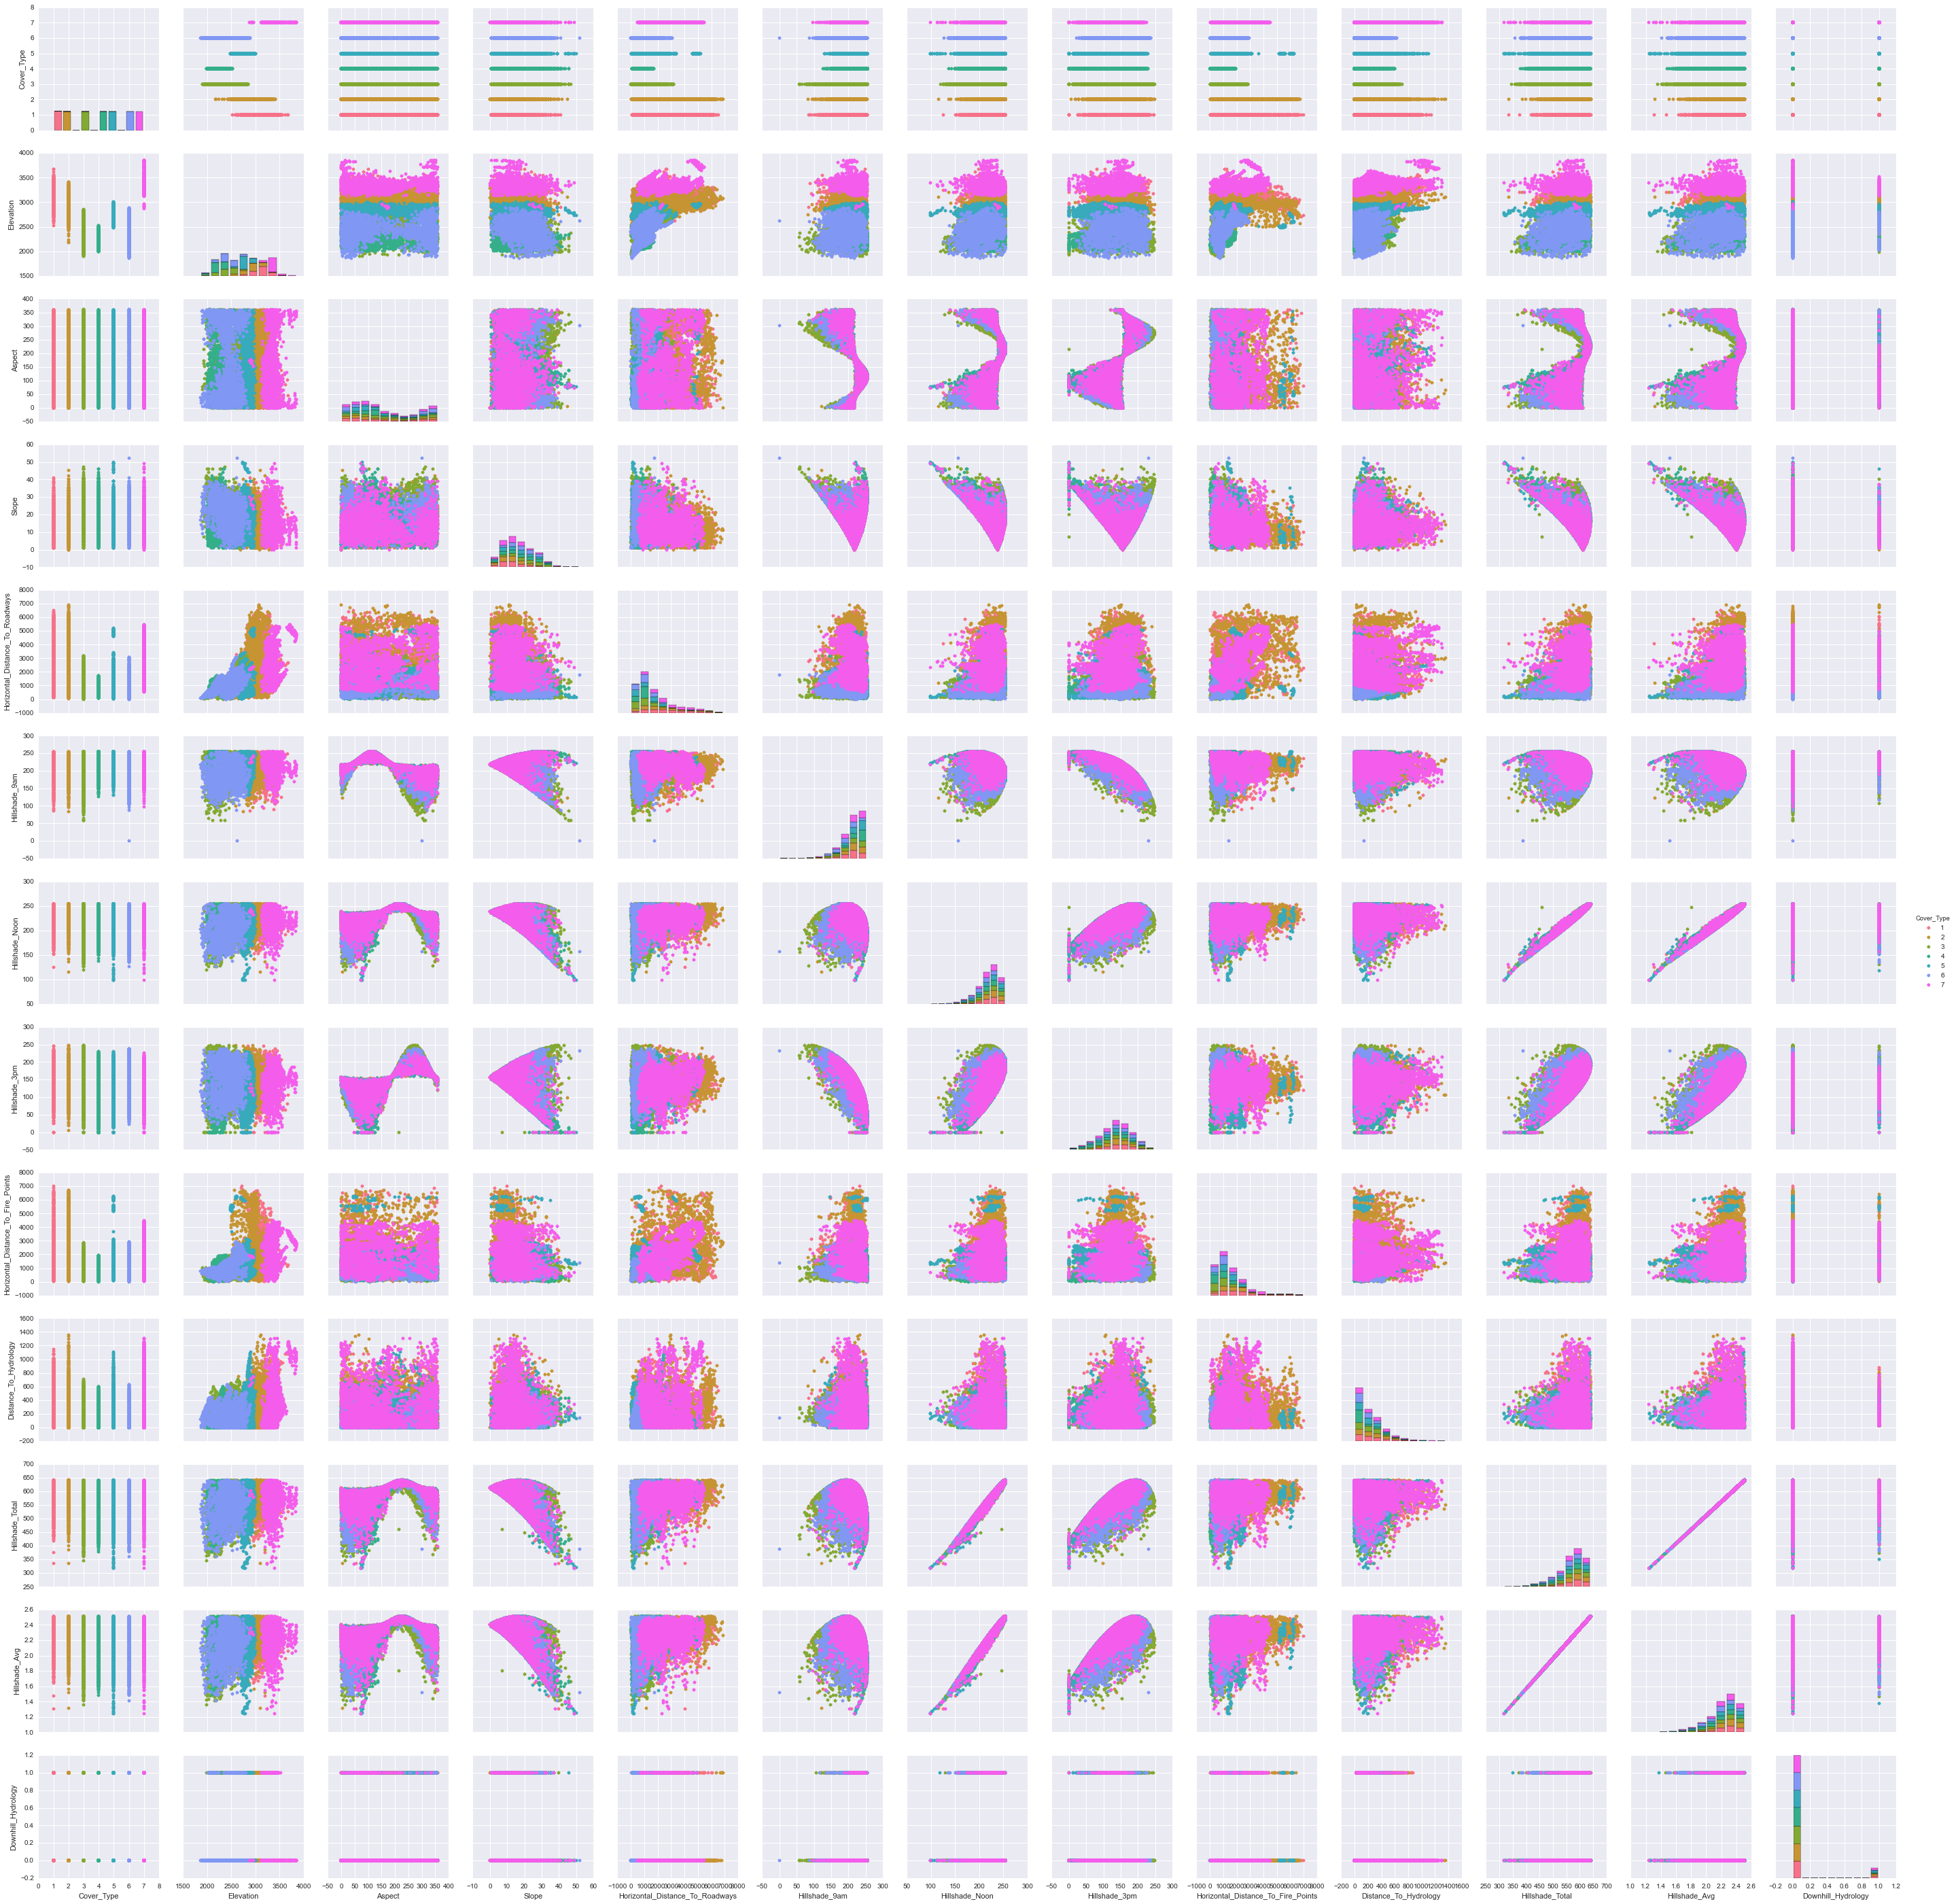

In [31]:
sns.pairplot(df_to_plot, hue="Cover_Type")

In [34]:
groups = train_set.groupby('Cover_Type')

In [35]:
groups.describe()

Aspect  Distance_To_Hydrology Downhill_Hydrology  \
Cover_Type                                                                
1          count  2160.000000            2160.000000               2160   
           mean    159.463426             276.741671          0.1115741   
           std     117.280496             225.594640          0.3149146   
           min       0.000000               0.000000              False   
           25%      54.000000              95.040780                  0   
           50%     123.000000             228.043853                  0   
           75%     286.000000             403.962539                  0   
           max     359.000000            1143.895537               True   
2          count  2160.000000            2160.000000               2160   
           mean    151.097222             294.099995         0.08611111   
           std     107.320930             220.036601           0.280593   
           min       0.000000               0.000000              False   
           25%      60.000000             127.801603                  0   
           50%     125.000000             248.379749                  0   
           75%     238.000000             413.835408                  0   
           max     359.000000            1356.939571               True   
3          count  2160.000000            2160.000000               2160   
           mean    173.672685             223.616266         0.05416667   
           std     108.013267             148.620236          0.2263987   
           min       0.000000               0.000000              False   
           25%      86.000000              98.615415                  0   
           50%     161.000000             204.589800                  0   
           75%     277.000000             325.170693                  0   
           max     360.000000             706.457359               True   
4          count  2160.000000            2160.000000               2160   
           mean    138.099537             113.485047         0.02361111   
           std      88.846589             149.109713          0.1518694   
           min       0.000000               0.000000              False   
           25%      82.000000               0.000000                  0   
           50%     119.000000              30.805844                  0   
           75%     162.000000             212.200211                  0   
           max     359.000000             599.770790               True   
5          count  2160.000000            2160.000000               2160   
           mean    137.992130             218.601709         0.09259259   
           std      91.772285             184.240545          0.2899278   
           min       0.000000               0.000000              False   
           25%      69.000000              85.287748                  0   
           50%     108.000000             180.384242                  0   
           75%     192.000000             303.809146                  0   
           max     359.000000            1107.014002               True   
6          count  2160.000000            2160.000000               2160   
           mean    180.617130             168.534700         0.06666667   
           std     133.087862             131.416721          0.2495016   
           min       0.000000               0.000000              False   
           25%      44.000000              60.299254                  0   
           50%     171.000000             144.848196                  0   
           75%     318.000000             252.549005                  0   
           max     360.000000             631.040411               True   
7          count  2160.000000            2160.000000               2160   
           mean    155.794444             356.562062         0.09259259   
           std     110.912616             301.220059          0.2899278   
           min       0.000000               0.00

In [38]:
groups.corr()

Aspect  \
Cover_Type                                                
1          Aspect                              1.000000   
           Distance_To_Hydrology               0.005641   
           Downhill_Hydrology                 -0.028163   
           Elevation                           0.092121   
           Hillshade_3pm                       0.669966   
           Hillshade_9am                      -0.588310   
           Hillshade_Avg                       0.394097   
           Hillshade_Noon                      0.356952   
           Hillshade_Total                     0.394097   
           Horizontal_Distance_To_Fire_Points -0.150061   
           Horizontal_Distance_To_Hydrology    0.004775   
           Horizontal_Distance_To_Roadways     0.007906   
           Id                                  0.059741   
           Slope                               0.032526   
           Soil_Type1                               NaN   
           Soil_Type10                        -0.070685   
           Soil_Type11                        -0.034205   
           Soil_Type12                        -0.046599   
           Soil_Type13                         0.030524   
           Soil_Type14                              NaN   
           Soil_Type15                              NaN   
           Soil_Type16                         0.006180   
           Soil_Type17                         0.021040   
           Soil_Type18                              NaN   
           Soil_Type19                         0.005946   
           Soil_Type2                               NaN   
           Soil_Type20                        -0.036168   
           Soil_Type21                         0.038058   
           Soil_Type22                         0.051771   
           Soil_Type23                         0.059634   
...                                                 ...   
7          Soil_Type23                        -0.003005   
           Soil_Type24                         0.020162   
           Soil_Type25                              NaN   
           Soil_Type26                              NaN   
           Soil_Type27                         0.041997   
           Soil_Type28                              NaN   
           Soil_Type29                        -0.018817   
           Soil_Type3                               NaN   
           Soil_Type30                        -0.047248   
           Soil_Type31                        -0.056986   
           Soil_Type32                        -0.010318   
           Soil_Type33                         0.003968   
           Soil_Type34                         0.019696   
           Soil_Type35                        -0.002304   
           Soil_Type36                         0.009598   
           Soil_Type37                        -0.121459   
           Soil_Type38                         0.148008   
           Soil_Type39                        -0.130152   
           Soil_Type4                          0.004440   
           Soil_Type40                         0.047037   
           Soil_Type5                               NaN   
           Soil_Type6                               NaN   
           Soil_Type7                               NaN   
           Soil_Type8                               NaN   
           Soil_Type9                               NaN   
           Vertical_Distance_To_Hydrology      0.066620   
           Wilderness_Area1                   -0.138813   
           Wilderness_Area2                    0.010844   
           Wilderness_Area3                    0.117736   
           Wilderness_Area4                         NaN   

                                               Distance_To_Hydrology  \
Cover_Type                                                             
1          Aspect                                           0.005641   
           Distance_To_Hydrology                            1.000000   
           Downhill_Hydrology              